<div style="padding:30px; color: white; background-color: #0071CD">
<center>
<img src="img/logoub.jpeg"></img>
<center>
<p>
<h1>Algor√≠tmica Avanzada</h1>
<h2>Pr√°ctica 1 - Grafos </h2>
</center>
</p>
</div>

<div class="alert alert-danger" style="width:95%; margin:0 auto; padding">
<center><p><h2> ¬°¬°IMPORTANTE!! </h2></p> </center> 

<p>
Para la realizaci√≥n de esta pr√°ctica tendr√©is que utilizar la clase de grafos NetworkX y <b>NO</b> la clase `Graph` que implementasteis en la Pr√°ctica 0. Hay casos muy concretos que no contemplaban los tests y podr√≠a hacer que vuestros algoritmos no funcionen correctamente. NetworkX tiene una interfaz muy similar a la librer√≠a <i>Graph</i> que implementasteis la semana pasada. Para m√°s informaci√≥n pod√©is consultar la documentaci√≥n de la librer√≠a <a href="https://networkx.github.io/documentation/latest/reference/introduction.html">aqu√≠.</a>
</p>
</div>

<div class="alert alert-info">
<center>
  <h1>Introducci√≥n</h1>
</center>

A lo largo de esta pr√°ctica trabajaremos con el grafo generado a partir de la red de metro de Londres. En este grafo, los nodos representan las estaciones y las aristas las vias que van de una estaci√≥n a otra. Todas las aristas tienen cuatro atributos:

* Linea
* Color
* Nombre (de la linea)
* Distancia

Los nodos contienen: 
* El nombre de la estaci√≥n
* La latitud y longitud de la estaci√≥n
* N√∫mero de lineas
* Zona


In [1]:
from util import get_subway_graph, draw_subway_graph
from networkx import nx

# Carga del grafo del metro con el que trabajaremos
G, lines = get_subway_graph('csv')

# Algunos nodos
print(list(G.nodes())[:20],'...')
# Algunas aristas
print(list(G.edges())[:20],'...')
print('\n')
print("Ejemplo de arista: ",G.edges[156,167])
print("Ejemplo de nodo: ",G.node[33])

[11, 163, 212, 49, 87, 197, 82, 193, 84, 148, 279, 113, 246, 298, 114, 140, 137, 206, 237, 143] ...
[(11, 163), (11, 212), (11, 83), (11, 104), (11, 28), (11, 249), (11, 94), (163, 82), (212, 192), (49, 87), (49, 197), (49, 151), (87, 279), (87, 255), (87, 285), (197, 192), (197, 107), (197, 151), (82, 193), (193, 278)] ...


Ejemplo de arista:  {'name': 'Metropolitan Line', 'color': '8b004c', 'stripe': 'NULL', 'line': 8, 'distance': 0.006350590523722737}
Ejemplo de nodo:  {'latitude': 51.5269, 'longitude': -0.0247, 'name': 'Bow Road', 'display_name': 'Bow<br />Road', 'zone': 2.0, 'total_lines': 2, 'rail': '0'}


Para m√°s consultas, la informaci√≥n ha sido extraida de Wikimedia Commons:

https://commons.wikimedia.org/wiki/London_Underground_geographic_maps/CSV

# util.py

En este archivo se os facilitan varias funciones que os permitiran cargar y visualizar la red de metro.
```python
"""
Retorna un objeto nx.Graph que corresponde al grafo de la red de metro y un 
diccionario con las lineas del metro
 - location: ruta donde esta almacenado el archivo .csv
"""
G, lines = get_subway_graph(location)

"""
Dibuja el grafo que le pasemos por parametro.
- G: Grafo de la red de metro
- lines: diccionario con la informaci√≥n sobre las lineas del metro
- figsize: parametro opcional que nos permite definir el tama√±o de la figura
- show_labels: parametro opcional que nos permite indicar si queremos mostrar los 
    nombres de las estaciones
"""
draw_subway_graph(G, lines, figsize=(10,6), show_labels=False)

```

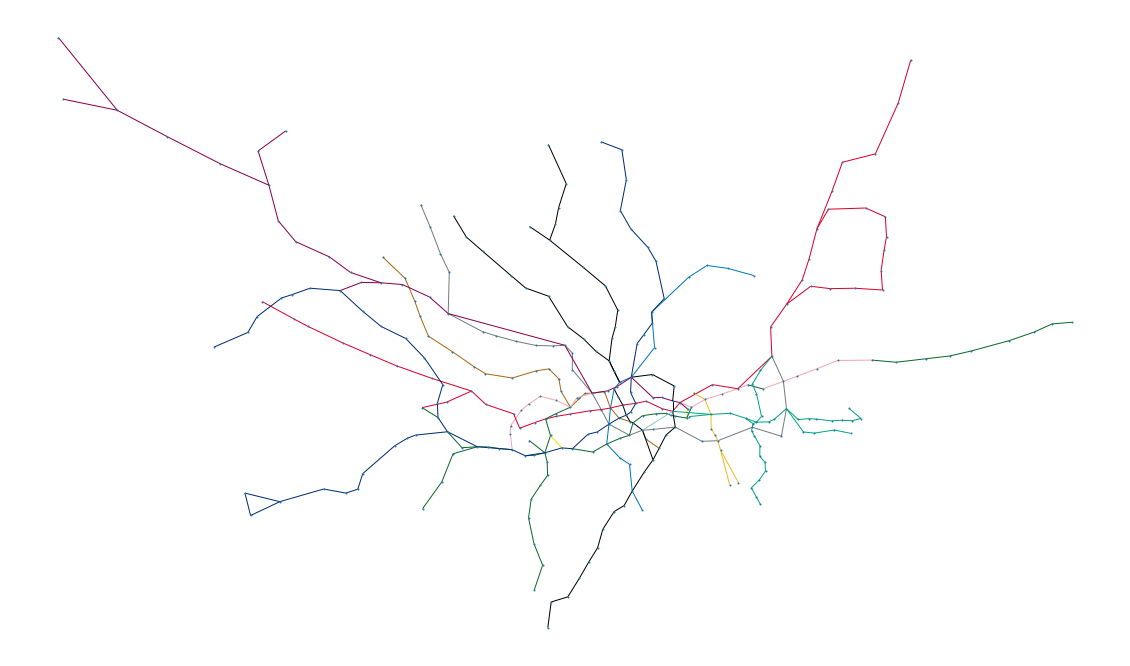

In [2]:
draw_subway_graph(G, lines, figsize=(20,12))

<div class="alert alert-info">
<center>
  <h1>Contenido</h1>
  </center><p>



<div class="alert alert-success" style="width:90%; margin:0 auto;">

  <h2><p>1- Dijkstra</p></h2>
  <p>
 En esta segunda parte de la pr√°ctica se propone que implement√©is el algoritmo <a href="https://en.wikipedia.org/wiki/Dijkstra%27s_algorithm">Dijkstra</a> (explicado en teor√≠a) para encontrar el camino m√°s corto entre dos paradas de la red de metro de Londres.
</p>



<div class="alert alert-danger" style="width:80%; margin:0 auto; padding">
<center><p><h3> C√≥digo </h3></p> </center>
<p>
<h3>INPUT</h3>
<ul>
<li>__G__: Este es el grafo (en el caso de esta practica la red de metro) que utilizaremos para buscar el camino. Debe de ser un objeto de tipo `nx.Graph`.</li>
<li>__origen__: Este par√°metro corresponde al √≠ndice de un nodo. En este caso, como indexamos los nodos con el identificador de las paradas de Metro, deber√° ser un entero _(e.g. 231)_.</li>
<li>__destino__: El indice del nodo al que queremos llegar. Igual que el origen, deber√° ser un entero.</li>
<li>__infinity=*(int)*__: Parametro opcional en el que definimos que numero nos va bien para utilizar como infinito en el momento de inicializar los pesos de los nodos.</li>
</ul>
<br>
<h3>OUTPUT</h3>
El output de una funcion es un <b>diccionario</b> que contiene los siguientes valores
<ul>
<li>__ _'path'_ __: Una lista de √≠ndices correspondientes al camino encontrado del nodo inicial al nodo final (ambos nodos, inicio y final, han de estar incluidos en esta lista).</li>
<li>__ _'expanded'_ __: El numero de nodos que se han visitado para encontrar la soluci√≥n.</li>
<li>__ _'distance'_ __: La distancia del camino m√≠nimo desde el origen hasta el destino (es decir, el valor del nodo destino).
<ul>

</p>
</div>


In [3]:
from math import inf

def dijkstra(G, origen, destino, infinity=inf):
    # All nodes left,
    # no parents,
    # all distances are inf
    
    left = list(G.nodes)
    parent = {n: None for n in G.nodes}
    distance = {n: infinity for n in G.nodes}
    
    expanded = 0
    
    # Origin node has distance 0
    distance[origen] = 0 
    
    while len(left) != 0:
        # We take the node in left with smaller distance
        # as the pivot node in every iteration
        _, _next = min([(distance[u], u) for u in left])
        
        left.remove(_next)
        expanded += 1
        
        for _neig in G.neighbors(_next):
            expanded += 1
            
            # We compute the distance and check 
            # if it's smaller than the actual one in distance dict
            # if True, we mark _next as parent of _neig
            _d = distance[_next] + G.edges[_next, _neig]["distance"]
            
            if _d < distance[_neig]:
                distance[_neig] = _d
                parent[_neig] = _next
    
    # Backtracking
    path = []
    c = destino
    
    while True:
        path.insert(0, c)
        c = parent[c]
        
        if c is origen:
            path.insert(0, c)
            break
    
    return {
        "path": path,
        "expanded": expanded,
        "distance": distance[destino]
    }

In [4]:
# Prueba tu algoritmo! 
_test = [10, 128, 39, 145, 89, 277, 192, 107, 133, 146, 236, 99, 74, 17, 110, 265, 1, 73, 182, 194, 5, 252, 251, 235]
_out = dijkstra(G, 10, 235)

print("üòÉ" if _test == _out["path"] else "üòï")

üòÉ


<div class="alert alert-success" style="width:90%; margin:0 auto;">

  <h2><p>2- Paradas intermedias</p></h2>
   <p>
 Se propone aqu√≠ implementar una variante del algoritmo Dijkstra que encuentre el camino m√°s corto entre dos paradas de metro forzando el mismo a pasar por una serie de paradas intermedias. Por ejemplo, queremos encontrar el camino m√°s corto entre el nodo 10 y 235 pero pasando por el 33 y el 122. El algoritmo debe encontrar el orden id√≥neo de visita de los nodos intermedios (33 --> 122 o 122 --> 33) sabiendo que empezamos en 10 y acabamos en 235.
</p>

<p></p>

<p>
<b> Nota: </b> Recordad que en Algor√≠tmica Avanzada buscamos la implementaci√≥n de algoritmos que no solo resuelvan el problema, sino que lo hagan de manera eficiente.
</p>


<div class="alert alert-danger" style="width:80%; margin:0 auto; padding">
<center><p><h3> C√≥digo </h3></p> </center>
<p>
<h3>INPUT</h3>
<ul>
<li>__G__: Este es el grafo (en el caso de esta practica la red de metro) que utilizaremos para buscar el camino. Debe de ser un objeto de tipo `nx.Graph`.</li>
<li>__origen__: Este par√°metro corresponde al √≠ndice de un nodo. En este caso, como indexamos los nodos con el identificador de las paradas de Metro, deber√° ser un entero _(e.g. 231)_.</li>
<li>__destino__: El indice del nodo al que queremos llegar. Igual que el origen, deber√° ser un entero.</li>
<li>__paradas__: Una lista de √≠ndices de nodos por los que queremos pasar de camino entre el origen y el destino. </li>
<li>__infinity=*(int)*__: Parametro opcional en el que definimos que numero nos va bien para utilizar como infinito en el momento de inicializar los pesos de los nodos.</li>
</ul>
<br>
<h3>OUTPUT</h3>
El output de una funcion es un <b>diccionario</b> que contiene los siguientes valores
<ul>
<li>__'ordering'__: Una lista de √≠ndices en el orden √≥ptimo de visita. El primer y √∫ltimo elemento de la lista deben corresponderse, respectivamente, con el nodo origen y destino. El resto de elementos de la lista ser√°n todas las paradas solicitadas.</li>
<li>__'expanded'__: El numero de nodos que se han visitado para encontrar la soluci√≥n.</li>
    <li>__'distance'__: La distancia que se recorrer√° desde el origen hasta el destino.</li>
</ul>

</p>


<p>
<b>Nota: </b> No se pide el camino completo entre origen y destino, solo el orden √≥ptimo de visita de los nodos. No obstante, se valorar√° positivamente la reconstrucci√≥n del camino completo. Si lo inclu√≠s, a√±adidlo al diccionario que se devuelve con la clave 'complete_path'.
    </p>
</div>


In [5]:
# We use memoizaton of the dijkstra function,
# so we may save some time when calling
# stop_ordering with a big paradas array
def memoize(func):
    cache = {}

    def helper(*args):
        if args in cache:
            return cache[args]
        
        result = func(*args)
        cache[args] = result
        
        return result

    return helper

dijkstra = memoize(dijkstra)

In [6]:
from itertools import permutations

def stops_ordering(G, origen, destino, paradas, infinity=inf):
    # Main global variables
    # to be returned
    expanded, distance = 0, 0
    path, ordering = [], []
    
    # Global minimum
    m = infinity
    
    # Loop over all possible trip 
    # permutations
    for p in permutations(paradas):
        _s = [origen] + list(p) + [destino]
        _d, _bad = 0, False
        _p, _e, _o = [], 0, []
        
        # We call dijkstra on every subtrip
        # and check if the relative distance is 
        # smaller then the global minimum
        for i in range(len(_s)-1):
            _tmp = dijkstra(G, _s[i], _s[i+1], infinity)
            _p += _tmp["path"]
            _e += _tmp["expanded"]
            _d += _tmp["distance"]
            
            # If the relative distance is above
            # the global minimum, we do not need
            # to continue, as it's a longer trip
            if m < _d:
                _bad = True
                break
        
        # If the current permutation is longer than
        # the minimum, we don't want to update the
        # global variables, so we continue to 
        # the next permutation
        if _bad:
            continue
        
        # We update the global minimum distance
        if _d < m:
            m = _d
        
        ordering = _s
        path = _p
        distance = _d
        expanded = _e
    
    # As we called dijkstra before, we have 
    # the path without the need of backtracking it
    return {
        "complete_path": path,
        "ordering": ordering,
        "expanded": expanded,
        "distance": distance
    }

In [7]:
# Prueba tu algoritmo! El orden de recorrido esperado es: 
_test = [10, 33, 122, 235]
_p = [122, 33]
_stops = stops_ordering(G, 10, 235, _p)

print("üòÉ" if _test == _stops["ordering"] else "üòï")
print("The path via the given stops {} is:\n{}".format(_p, _stops["complete_path"]))

üòÉ
The path via the given stops [122, 33] is:
[10, 128, 39, 145, 92, 14, 167, 156, 3, 295, 244, 164, 33, 33, 164, 244, 295, 3, 156, 13, 279, 285, 248, 273, 229, 236, 99, 122, 122, 74, 17, 110, 265, 1, 73, 182, 194, 5, 252, 251, 235]


In [8]:
_p = [122, 33, 9, 201, 13, 67, 99, 198]
_stops = stops_ordering(G, 1, 199, _p)

print("The ordering via the given stops {} is:\n{}\nWith distance: {}"
      .format(
        _p,
        _stops["ordering"],
        _stops["distance"]
        )
     )

The ordering via the given stops [122, 33, 9, 201, 13, 67, 99, 198] is:
[1, 122, 99, 198, 13, 201, 67, 33, 9, 199]
With distance: 1.266297637323176


<div class="alert alert-warning" style="width:80%; margin:0 auto; padding">
<center><p><h3> Comentarios Dijkstra</h3></p> </center> </div>

L'algoritme emprat √©s el est√†ndard.
La complexitat d'aquest √©s $O((V+E) \log V)$, on $V$ √©s el nombre de nodes i $E$ el nombre de d'aristes.

<div class="alert alert-warning" style="width:80%; margin:0 auto; padding">
<center><p><h3> Comentarios Orden √≥ptimo de Paradas Intermedias</h3></p> </center> </div>

El problema plantejat √©s equivalent al [Travelling Salesman Problem](https://en.wikipedia.org/wiki/Travelling_salesman_problem). En la soluci√≥ plantejada, he utilitzat l'algortime directe, calculant totes les possibles combinacions, per√≤ tenin en compte un m√≠nim global. D'aquesta manera, si en alguna permutaci√≥ ja s'ha excedit dit l√≠mit, no es segueix computant. Es podria utilitzar alg√∫n tipus d'heur√≠stica tamb√©.

La complexitat d'aquest √©s, en el pitjor cas: $O((n+1)! \cdot X)$ on $n$ √±es el nombre de parades i $X$ √©s la complexitat de Dijkstra. Utilitzant la funci√≥  de cache `memoize` i aplicant-la a la funci√≥ `dijsktra`, podem arribar a estalviar un gran nombre d'iteraci√≥n per a casos en que $n$ √©s prou gran.

<div class="alert alert-info">
<center>
  <h1>Entrega</h1>
</center>
<p>
La entrega de esta pr√°ctica se podr√° realizar en el campus virtual hasta el d√≠a <b>27 de Octubre a las 23:55</b>. En la tarea que se habilitar√° en el campus deber√©is colgar √∫nicamente este notebook con el nombre:
</p>
<p>
```
* [grupo]_[apellido]_[nombre]_1-Grafos.ipynb
```

</p>
<p>
    Por ejemplo, para un alumno llamado <i>Nombre Gen√©rico</i> perteneciente al <i>grupo Z</i> el nombre del archivo deber√≠a ser:
</p>
<p>
```
Z_Generico_Nombre_1-Grafos.ipynb
```

</p>
<p>

Es muy importante que en el notebook exista <b> una sola funci√≥n </b> con el nombre <i>dijkstra</i> y <i>stops_ordering</i> ya que emplearemos un corrector autom√°tico para agilizar el proceso. No os preocup√©is si no os funciona del todo, el no pasar los tests no significa necesariamente que teng√°is un 0 en la pr√°ctica; tambi√©n revisaremos manualmente el c√≥digo as√≠ como los comentarios del final del notebook y vuestro an√°lisis de complejidad.


Es fundamental que el c√≥digo est√© bi√©n comentado y con un an√°lisis de complejidad exhaustivo del algoritmo. La importancia de poner nombre correcto al archivo deber√≠a ser directamente proporcional a lo contentos que quer√°is que los profesores de pr√°cticas corrijan.
</p>
</div>